In [74]:
import pandas as pd

df = pd.read_json("News_Category_Dataset_v3.json", lines=True)
df = df[['category', 'headline', 'short_description']]



In [75]:
df.shape

(209527, 3)

In [76]:
df['text'] = df['headline'] + " " + df['short_description']

In [77]:
print(df['category'].unique())


['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


In [ ]:
categories = ["COMEDY", "CULTURE & ARTS", "TECH", 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'ENVIRONMENT',
 'EDUCATION', 'CRIME', 'SCIENCE', 'BUSINESS', 'STYLE & BEAUTY']
nb_categories = len(categories)
print(f"nb of categories: {nb_categories}")

nb of categories: 13


In [79]:
df.shape

(209527, 4)

In [80]:
#filder df 
df = df[df['category'].isin(categories)]
# Reset index after filtering
df = df.reset_index(drop=True)

In [81]:
df.shape

(108596, 4)

In [82]:
print(f"Filtered dataset has {len(df)} samples across {df['category'].nunique()} categories.")
print(df[['category', 'text']].head())

Filtered dataset has 108596 samples across 13 categories.
         category                                               text
0          COMEDY  23 Of The Funniest Tweets About Cats And Dogs ...
1  CULTURE & ARTS  How A New Documentary Captures The Complexity ...
2            TECH  Twitch Bans Gambling Sites After Streamer Scam...
3  CULTURE & ARTS  'Reboot' Is A Clever And Not Too Navel-Gazey L...
4          SPORTS  Maury Wills, Base-Stealing Shortstop For Dodge...


In [83]:
df = df.drop_duplicates()
df.shape

(108370, 4)

### Step 2: Exploratory Data Analysis (EDA)

In [84]:
category_counts = df['category'].value_counts()
print(category_counts)

category
POLITICS          35585
WELLNESS          17940
ENTERTAINMENT     17358
STYLE & BEAUTY     9681
BUSINESS           5990
COMEDY             5390
SPORTS             5077
CRIME              3558
SCIENCE            2206
TECH               2055
ENVIRONMENT        1443
CULTURE & ARTS     1073
EDUCATION          1014
Name: count, dtype: int64


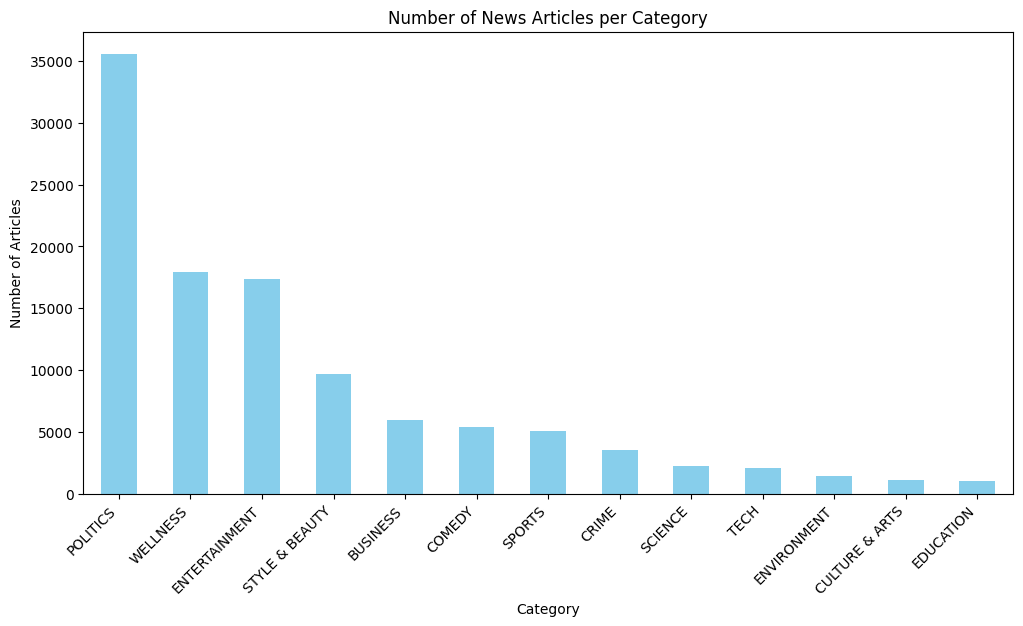

In [85]:
import matplotlib.pyplot as plt
#the distribution
plt.figure(figsize=(12,6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of News Articles per Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()


In [86]:
# sample text from each category
for cat in category_counts.index:
    print(f"\n--- Sample from category: {cat} ---")
    print(df[df['category'] == cat]['text'].values[0])



--- Sample from category: POLITICS ---
Biden Says U.S. Forces Would Defend Taiwan If China Invaded President issues vow as tensions with China rise.

--- Sample from category: WELLNESS ---
6 Signs You’re Grinding Your Teeth At Night (And What To Do About It) Beyond toothaches, there are other common red flags that you're dealing with nighttime teeth grinding.

--- Sample from category: ENTERTAINMENT ---
Golden Globes Returning To NBC In January After Year Off-Air For the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journalists included no Black members.

--- Sample from category: STYLE & BEAUTY ---
How To Hide Even The Worst Tan Lines, According To Makeup Pros Quick solutions to fix your farmer’s tan, from body makeup to self tanner.

--- Sample from category: BUSINESS ---
REI Workers At Berkeley Store Vote To Unionize In Another Win For Labor They follow in the footsteps of REI workers in New York City who for

What you learn here:
- which categories are balanced or imbalanced (important for model choice)

- How the text looks per category (gives intuition about data quality)

- Helps decide if you want to do any category filtering or merging

###  Step 3: Text Preprocessing

In [87]:
!pip install nltk


In [88]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [89]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove punctuation, numbers, special chars
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenize
    words = word_tokenize(text)
    
    # 4. Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # 5. Join back to string
    return " ".join(words)

# Apply to your dataset
df['clean_text'] = df['text'].apply(preprocess_text)

# Check the result
print(df[['text', 'clean_text']].head())


                                                text  \
0  23 Of The Funniest Tweets About Cats And Dogs ...   
1  How A New Documentary Captures The Complexity ...   
2  Twitch Bans Gambling Sites After Streamer Scam...   
3  'Reboot' Is A Clever And Not Too Navel-Gazey L...   
4  Maury Wills, Base-Stealing Shortstop For Dodge...   

                                          clean_text  
0  funniest tweet cat dog week sept dog dont unde...  
1  new documentary capture complexity child immig...  
2  twitch ban gambling site streamer scam folk on...  
3  reboot clever navelgazey look inside tv reboot...  
4  maury will basestealing shortstop dodger dy ma...  


### Step 4: Feature Extraction with TF-IDF

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can tune max_features

# Fit on cleaned text and transform
X = vectorizer.fit_transform(df['clean_text'])

print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (108370, 10000)


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels if not done yet
le = LabelEncoder()
y = le.fit_transform(df['category'])

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Train set size: 86696 samples
Test set size: 21674 samples


In [92]:
# Mapping from integer label to category name
label_map = dict(zip(le.transform(le.classes_), le.classes_))
print(label_map)


{np.int64(0): 'BUSINESS', np.int64(1): 'COMEDY', np.int64(2): 'CRIME', np.int64(3): 'CULTURE & ARTS', np.int64(4): 'EDUCATION', np.int64(5): 'ENTERTAINMENT', np.int64(6): 'ENVIRONMENT', np.int64(7): 'POLITICS', np.int64(8): 'SCIENCE', np.int64(9): 'SPORTS', np.int64(10): 'STYLE & BEAUTY', np.int64(11): 'TECH', np.int64(12): 'WELLNESS'}


### Step 5: Train a Logistic Regression Classifier

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize the model
model = LogisticRegression(max_iter=200)

# 2. Train on the training data
model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = model.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.7953769493402233

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.69      0.54      0.60      1189
        COMEDY       0.66      0.43      0.52      1104
         CRIME       0.79      0.64      0.71       768
CULTURE & ARTS       0.85      0.33      0.48       222
     EDUCATION       0.70      0.38      0.49       207
 ENTERTAINMENT       0.74      0.83      0.79      3507
   ENVIRONMENT       0.73      0.30      0.43       277
      POLITICS       0.83      0.93      0.87      7082
       SCIENCE       0.80      0.51      0.62       453
        SPORTS       0.84      0.68      0.75      1038
STYLE & BEAUTY       0.87      0.84      0.86      1862
          TECH       0.72      0.43      0.54       370
      WELLNESS       0.80      0.91      0.85      3595

      accuracy                           0.80     21674
     macro avg       0.77      0.60      0.65     21674
  weighted avg       0.79      0.80      0.78   

In [94]:
import pickle

# Save the trained model
with open("news_classifier.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the LabelEncoder
with open("label_encoder.pkl", "wb") as le_file:
    pickle.dump(le, le_file)
    
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [95]:
# Load model and encoder
with open("news_classifier.pkl", "rb") as model_file:
    model = pickle.load(model_file)

with open("label_encoder.pkl", "rb") as le_file:
    le = pickle.load(le_file)

# Load the TF-IDF vectorizer too, if you saved it:
with open("tfidf_vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)


In [103]:
# Example new headline + description
new_text = "Stock markets rally as the Federal Reserve signals pause in rate hikes."

# Preprocess it (same as before)
cleaned = preprocess_text(new_text)  # use your earlier function

# Vectorize
vectorized = vectorizer.transform([cleaned])

# Predict
predicted_label_int = model.predict(vectorized)[0]
predicted_label_str = le.inverse_transform([predicted_label_int])[0]

print("Predicted category:", predicted_label_str)


Predicted category: BUSINESS


In [97]:
"""from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)"""


'from sklearn.naive_bayes import MultinomialNB\nmodel = MultinomialNB()\nmodel.fit(X_train, y_train)\ny_pred = model.predict(X_test)'